In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

from sklearn.manifold import TSNE


In [2]:
data = pd.read_csv('cmm_erdos_2022/pharmacy_tx.csv')

In [3]:
#drug importance by diagnosis code

data_temp = data.groupby(['drug','diagnosis'],as_index=False).size()
data_temp['num'] =data_temp['size']
del data_temp['size']

data_temp = pd.merge(data_temp,data_temp.groupby(['drug'],as_index=False).num.sum(), on=['drug'] ,how='inner')

data_temp['drug_importance_by_diag'] = (data_temp['num_x']/data_temp['num_y'])*100
data_temp = data_temp[['drug','diagnosis','drug_importance_by_diag']]

data_temp = pd.pivot_table(data_temp,columns=['diagnosis'],index=['drug']).fillna(0).reset_index()
data_temp


drug drug_importance_by_diag            \
diagnosis                                           A00.82    A13.39   
0                  branded antimab                0.045003  0.000000   
1                  branded bovirol                0.000000  0.000000   
2                    branded brede                0.000000  0.000000   
3           branded choxestamenium                0.000000  0.000000   
4            branded cibroniudosin                0.000000  0.000000   
..                             ...                     ...       ...   
109             generic tanoclolol                0.000000  0.000000   
110        generic thiostasteglume                0.000000  5.481856   
111            generic todiadianic                0.000000  0.000000   
112                 generic tovane                0.000000  0.622074   
113              generic vocopirin                0.000000  0.000000   

                                                                         ...  \
diagnosis    A14.01 A22.87    A45.07 B03.27 B05.36    B42.10     B45.03  ...   
0          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
1          0.000000    0.0  0.000000    0.0    0.0  1.585574   0.000000  ...   
2          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
3          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
4          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
..              ...    ...       ...    ...    ...       ...        ...  ...   
109        0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
110        0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
111        0.000000    0.0  0.000000    0.0    0.0  0.000000  95.304392  ...   
112        0.000000    0.0  0.086885    0.0    0.0  0.000000   0.000000  ...   
113        1.673286    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   

                                                                              \
diagnosis     Y11.84     Y51.55 Y97.47    Z04.98 Z20.23 Z25.06 Z34.94 Z66.42   
0           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
1           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
2           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
3           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
4           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
..               ...        ...    ...       ...    ...    ...    ...    ...   
109         0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
110         0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
111         0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
112        38.401434   7.054593    0.0  0.008447    0.0    0.0    0.0    0.0   
113         0.000000  12.762332    0.0  0.000000    0.0    0.0    0.0    0.0   

                                
diagnosis    Z95.40     Z98.86  
0          0.000000   0.000000  
1          0.000000   0.000000  
2          0.000000   0.000000  
3          0.000000   0.000000  
4          0.899864   0.000000  
..              ...        ...  
109        0.000000   0.000000  
110        0.000000  76.212536  
111        0.000000   0.000000  
112        0.000000   0.000000  
113        0.000000   0.000000  

[114 rows x 134 columns]

In [4]:
# finding disease code which a drug is most prescribed for

for row in data_temp.index:
    max_code='';max=0
    for col in data_temp.columns[1:]:
        if data_temp.loc[row,col] >max:
            max=data_temp.loc[row,col]
            max_code=col[1]

    data_temp.loc[row,'prescribed_most_for'] = max_code

data_temp[['drug','prescribed_most_for']]

,drug,prescribed_most_for
diagnosis,,
0,branded antimab,H36.57
1,branded bovirol,G99.93
2,branded brede,P07.55
3,branded choxestamenium,G51.87
4,branded cibroniudosin,K32.86
...,...,...
109,generic tanoclolol,G99.93
110,generic thiostasteglume,Z98.86
111,generic todiadianic,B45.03


# TSNE projection

In [5]:
tsne_model = TSNE(perplexity=20,metric='cosine',n_iter=500,init='random',learning_rate='auto')
pts = tsne_model.fit_transform(data_temp.iloc[:,1:-1])

df=pd.DataFrame(pts,columns=['proj1','proj2'])
df['diagnosis code']=data_temp['prescribed_most_for']
df= df.sort_values(by='diagnosis code')


/Users/mitabanik/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/Users/mitabanik/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


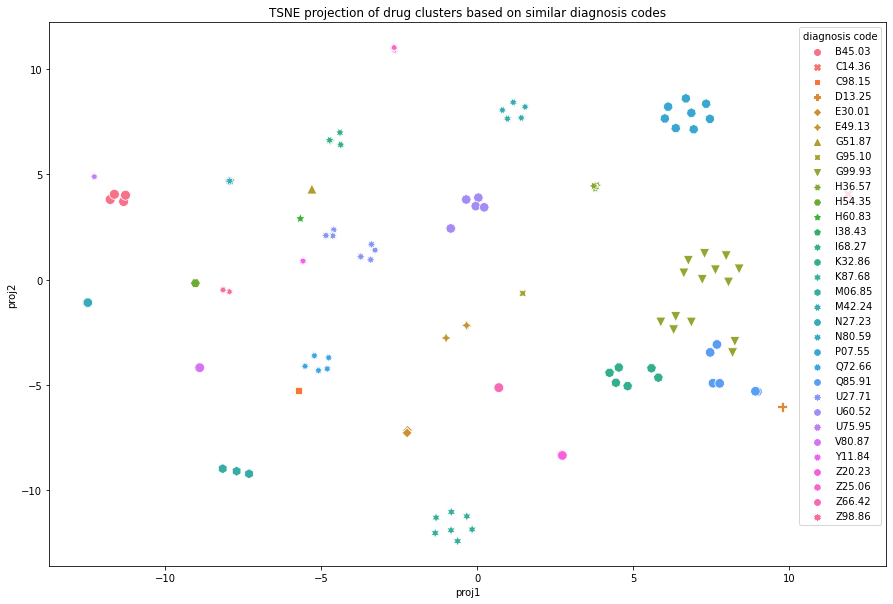

In [6]:
fig, ax = plt.subplots(figsize=(15,10))

sns.color_palette("tab10")
ax = sns.scatterplot(data=df,x="proj1",y="proj2",hue='diagnosis code',s=100,style="diagnosis code")
ax.set_title('TSNE projection of drug clusters based on similar diagnosis codes')
plt.show()

Conclusion: We observe drugs prescribed to particular diseases(diagnosis codes) are clustered together. When these clusters are closer to other diagnosis code clusters; we can interpret that these drugs are closer to each other in treatment.